# Import

In [76]:
import os
import time

import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score


# Load dataset

In [53]:
dataset_path = "E:/LEARNING/Machine_Learning/Datasets/spam_email_dataset/email.csv"
df = pd.read_csv(dataset_path)
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [54]:
df.shape

(5573, 2)

# Data preprocessing

In [55]:
# Check NaN values
print(f"Number of NaN values in Message: {df['Message'].isna().sum()}")
print(f"Number of NaN values in Category: {df['Category'].isna().sum()}")

# Remove NaN values
df = df.dropna()
print(df.shape)

Number of NaN values in Message: 0
Number of NaN values in Category: 0
(5573, 2)


In [56]:
print(df["Category"].unique())

['ham' 'spam' '{"mode":"full"']


In [61]:
print(df.iloc[len(df)-1, 0])
# Drop last row of df
df = df.drop(df.index[len(df)-1])

{"mode":"full"


In [62]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [63]:
# Encode for "Category" column, spam = 1, ham = 0
df["Category"] = df["Category"].map({"spam": 1, "ham": 0})
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [64]:
print(df["Category"].unique())

[0 1]


In [65]:
# We need to convert text to number for "Message"
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Message'])
print(f"Shape of X: {X.shape}")
print(f"Number of features: {len(vectorizer.get_feature_names_out())}")
print(X[0].shape)

Shape of X: (5572, 8709)
Number of features: 8709
(1, 8709)


In [66]:
y = df["Category"]
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Category, dtype: int64

In [68]:
# Split dataset into trainset and testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model

In [ ]:
# Training model
model = DecisionTreeClassifier(random_state=42)
clf = model.fit(X_train, y_train)

[Text(0.8823726541554959, 0.9910714285714286, 'x[1824] <= 0.5\ngini = 0.232\nsamples = 4457\nvalue = [3859, 598]'),
 Text(0.8076407506702413, 0.9732142857142857, 'x[7982] <= 0.5\ngini = 0.155\nsamples = 4017\nvalue = [3676, 341]'),
 Text(0.8450067024128687, 0.9821428571428572, 'True  '),
 Text(0.7546916890080428, 0.9553571428571429, 'x[8592] <= 0.5\ngini = 0.111\nsamples = 3899\nvalue = [3668, 231]'),
 Text(0.7131367292225201, 0.9375, 'x[3369] <= 0.5\ngini = 0.094\nsamples = 3856\nvalue = [3666, 190]'),
 Text(0.6621983914209115, 0.9196428571428571, 'x[2063] <= 0.5\ngini = 0.074\nsamples = 3773\nvalue = [3628, 145]'),
 Text(0.6514745308310992, 0.9017857142857143, 'x[350] <= 0.5\ngini = 0.066\nsamples = 3757\nvalue = [3628, 129]'),
 Text(0.6407506702412868, 0.8839285714285714, 'x[8012] <= 0.5\ngini = 0.06\nsamples = 3743\nvalue = [3628, 115]'),
 Text(0.6193029490616622, 0.8660714285714286, 'x[7834] <= 0.5\ngini = 0.054\nsamples = 3730\nvalue = [3627, 103]'),
 Text(0.6085790884718498, 0.8

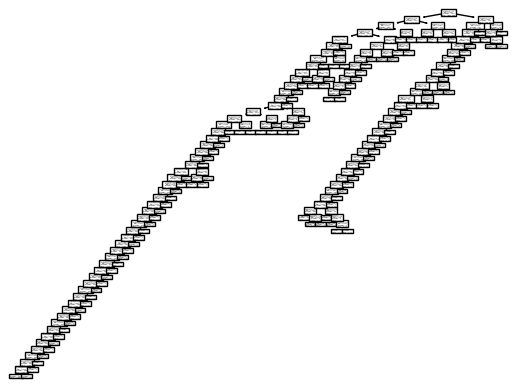

In [ ]:
# Plot the tree
tree.plot_tree(clf)

# Evaluation

In [77]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

print("Classification Report:")
print(report)

Accuracy: 0.9730941704035875
Precision: 0.9103448275862069
Recall: 0.8859060402684564
F1 Score: 0.8979591836734694
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       966
           1       0.91      0.89      0.90       149

    accuracy                           0.97      1115
   macro avg       0.95      0.94      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(confusion_matrix)


Confusion Matrix:
[[953  13]
 [ 17 132]]


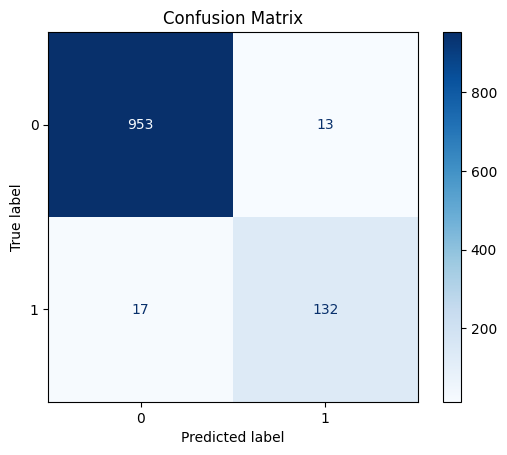

In [79]:
# Plot confusion maxtrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues) # Customize colormap if desired
plt.title("Confusion Matrix")
plt.show()